In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [2]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values
print(dataset_train)
# Data transformation
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(len(X_train))


            Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  3423509          7999.55  
...

In [3]:
# Initialize the RNN model
model = Sequential()

# Add the first SimpleRNN layer with return_sequences=True
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add the second SimpleRNN layer with return_sequences=True
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the third SimpleRNN layer with return_sequences=True
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the fourth SimpleRNN layer without return_sequences
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Add the Dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\uzi\Desktop\deeplearning\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - loss: 0.0097
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0029
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0030
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0026
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - loss: 0.0024
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0022
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0021
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0020
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0021
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0018
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0020
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0019
Epoch 13/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0018
Epoch 14/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0015
Epoch 15/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 0.0017


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


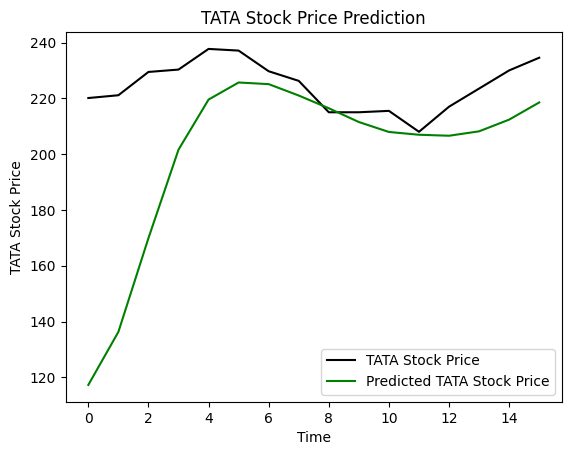

In [5]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Prediction
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()
print()